# COMP 4151 - Assignment 3

## Due: 9/26/2019

## Name:

**Note**: 

- All work in this assignment must be done, created, originated from each student. 
- All external assistance must be explicitly mentioned and cited. 
- Using work done by others without explicit citation is considered cheating. 
- A student will receive a zero grade on the assignment for cheating. 
- Repeated offence will lead to additional consequences.

### Dataset to use for this assignment

Source:
https://umdrive.memphis.edu/vphan/public/4151/tips.csv


#### Question 1: Describe if there is any missing or unusual with the data set.

In [101]:
import pandas
tips = pandas.read_csv('/Users/XinJu/Desktop/Fall 2019/COMP 4151/Datasets/tips.csv')
tips.sample(10)

,total_bill,tip,sex,smoker,day,time,size
163,13.81,2.00,Male,No,Sun,Dinner,2
102,44.30,2.50,Female,Yes,Sat,Dinner,3
26,13.37,2.00,Male,No,Sat,Dinner,2
125,29.80,4.20,Female,No,Thur,Lunch,6
76,17.92,3.08,Male,Yes,Sat,Dinner,2
40,16.04,2.24,Male,No,Sat,Dinner,3
97,12.03,1.50,Male,Yes,Fri,Dinner,2
181,23.33,5.65,Male,Yes,Sun,Dinner,2
187,30.46,2.00,Male,Yes,Sun,Dinner,5
164,17.51,3.00,Female,Yes,Sun,Dinner,2


In [13]:
#Check for missing values:
null = tips.isnull().sum() #Check each column for number of null values
null

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [15]:
#Find all values of column 'day'
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [16]:
#Find all values of column 'time'
tips['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [32]:
#Find all values of column 'size'
tips['size'].value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

The dataset contains no missing values. 

It appears that there are no customers from Monday through Wednesday, and no customers purchase breakfast. 


#### Question 2: What is the average total bill, median of total bill?  Explain how you get the answers.

In [5]:
#Average total bill
tips['total_bill'].mean()

19.78594262295082

In [6]:
#Median total bill
tips['total_bill'].median()

17.795

Average Total Bill: about $19.79

Median Total Bill: about $17.76

#### Question 3: Plot the distribution of total bill.

In [7]:
import seaborn
from matplotlib import pyplot

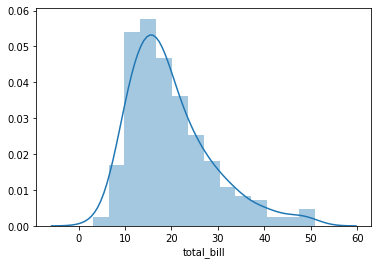

In [9]:
seaborn.distplot(tips['total_bill'])

#### Question 4: Compare and visualize the difference in total bills on different days of the week.

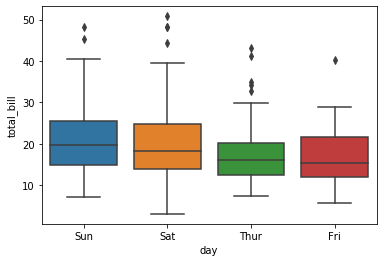

In [25]:
#Total Bills vs. Day of the Week:
seaborn.boxplot(x='day', y='total_bill', data = tips) 

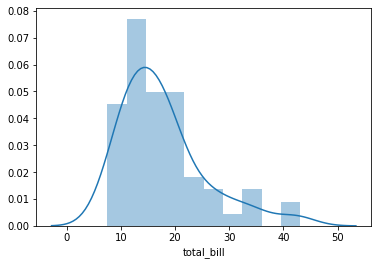

In [19]:
#Total Bills Distribution on Thursday
thursday = tips.loc[ tips['day']=='Thur' ]
seaborn.distplot(thursday['total_bill'])

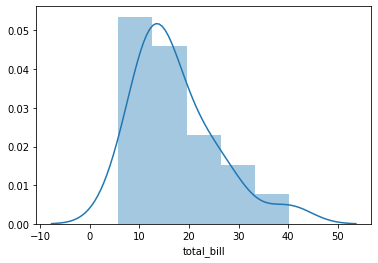

In [21]:
#Total Bills Distribution on Friday
friday = tips.loc[ tips['day']=='Fri' ]
seaborn.distplot(friday['total_bill'])

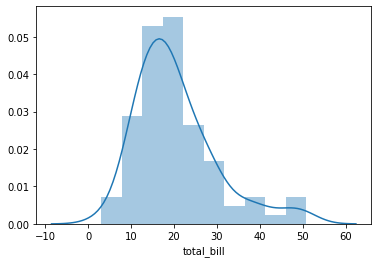

In [22]:
#Total Bills Distribution on Saturday
saturday = tips.loc[ tips['day']=='Sat' ]
seaborn.distplot(saturday['total_bill'])

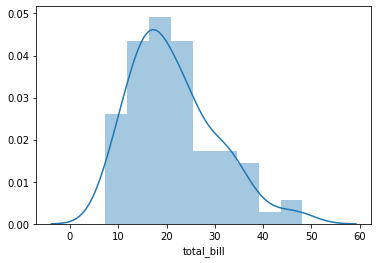

In [23]:
#Total Bills Distribution on Sunday
sunday = tips.loc[ tips['day']=='Sun' ]
seaborn.distplot(sunday['total_bill'])

It appears that the median total bill does not deviate by much throughout the week, remaining close to around $20 from Sunday through Friday. 

The total bill distribution for each day is right-skewed.

The distribution of total bills on Saturday covers the widest range, with outliers around $50.

#### Question 5: Who tip more on average, smokers or non-smokers?  Explain how you obtain your answer.

In [31]:
#Find average of non-smoker tips
cond1 = tips['smoker'] == 'No'
non_smokers = tips.loc[cond1]
avg_tip_non_smokers = non_smokers['tip'].mean()
print('Average tip for Non-Smokers: ',avg_tip_non_smokers)


#Find average of smoker tips
cond2 = tips['smoker'] == 'Yes'
smokers = tips.loc[cond2]
avg_tip_smokers = smokers['tip'].mean()
print('Average tip for Smokers: ',avg_tip_smokers)

Average tip for Non-Smokers:  2.9918543046357615
Average tip for Smokers:  3.008709677419355


Whether or not a customer smokes appears to have little to no impact on the size of their tip. I obtained my conclusion from examining the average tips of both smokers nad non-smokers. 

Average tip for a non-smoker: around $2.99

Average tip for a smoker: around $3.01. 

#### Question 6: Who usualy pay for the bills on Saturday, men or women? Explain how you obtain your answer.

In [46]:
#Select all rows/parties visiting on Saturday and for which a female paid the bill
cond3 = (tips['sex'] == 'Female') & (tips['day'] == 'Sat')
females_count = len(tips.loc[cond3])
print('Number of Females who paid on Saturday: ', females_count)

#Select all rows/parties visiting on Saturday and for which a male paid the bill
cond4 = (tips['sex'] == 'Male') & (tips['day'] == 'Sat')
males_count = len(tips.loc[cond4])
print('Number of Males who paid on Saturday: ', males_count)


Number of Females who paid on Saturday:  28
Number of Males who paid on Saturday:  59


Males typically pay for the bills on Saturday. I obtained this conclusion by selecting and counting the total number of males who paid on Saturday and the total number of females who paid on Saturday. 

Number of Females who paid on Saturday:  28

Number of Males who paid on Saturday:  59

#### Question 7: Which day of the week has the highest tip percentage? And by which gender (men or women)? Explain how you obtain your answer.

In [102]:
#Calculate tip percents for each row and create df of tip percentages
tip_percent = pandas.DataFrame((tips['tip']/ tips['total_bill']) * 100)

#Rename the column of the data frame to 'tip_percent'
tip_percent = tip_percent.rename(columns = {0 : 'tip_percent'})

tip_percent.head(5)

,tip_percent
0,5.944673
1,16.054159
2,16.658734
3,13.978041
4,14.680765


In [105]:
#Join tip_percent to tips data frame
df_tips = tips.join(tip_percent)
#Source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html

In [107]:
df_tips.head(10)

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
5,25.29,4.71,Male,No,Sun,Dinner,4,18.623962
6,8.77,2.00,Male,No,Sun,Dinner,2,22.805017
7,26.88,3.12,Male,No,Sun,Dinner,4,11.607143
8,15.04,1.96,Male,No,Sun,Dinner,2,13.031915
9,14.78,3.23,Male,No,Sun,Dinner,2,21.853857


In [110]:
#Find the rows with the highest tip_percents
df_tips.sort_values(by = 'tip_percent', ascending = False)[0:5]

,total_bill,tip,sex,smoker,day,time,size,tip_percent
172,7.25,5.15,Male,Yes,Sun,Dinner,2,71.034483
178,9.60,4.00,Female,Yes,Sun,Dinner,2,41.666667
67,3.07,1.00,Female,Yes,Sat,Dinner,1,32.573290
232,11.61,3.39,Male,No,Sat,Dinner,2,29.198966
183,23.17,6.50,Male,Yes,Sun,Dinner,4,28.053517


The highest tip percent was given by a male on Sunday. 

I obtained this answer by first creating a data frame containing only tip percents (which I joined to the tips data frame), and then sorting through the rows by tip_percent value.